<a href="https://colab.research.google.com/github/Man2Dev/colab/blob/master/Another_copy_of_MainProject_Fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Data Collection and Preparation

***The Variables:***
*   **data :** The original data
*   **tb_data :** Tuborclosis data from 3 countries
*   **al_data :**Alchohol consumption data from 3 countries

*   **tuberiran :** Total Tuborclosis data from Iran

*   **tuberindia :** Total Tuborclosis data from India

*   **tuberGermany :** Total Tuborclosis data from India

*   **Alchohol_Iran :**Total alchohol consumption in Iran

*   **Alchohol_India:** Total alchohol consumption in India

*   **Alchohol_Germany :** Total alchohol consumption in Germany

Importing the dataset into the array named *data*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
data=pd.read_csv('gdrive/My Drive/Colab Notebooks/Data Folder/alcohol.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Comparing TB incidence in Iran , India and Germany from 2000 to 2020 per 100,000 people

<ipython-input-16-0accf22c24ed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_data[year_columns] = tb_data[year_columns].apply(pd.to_numeric, errors='coerce')


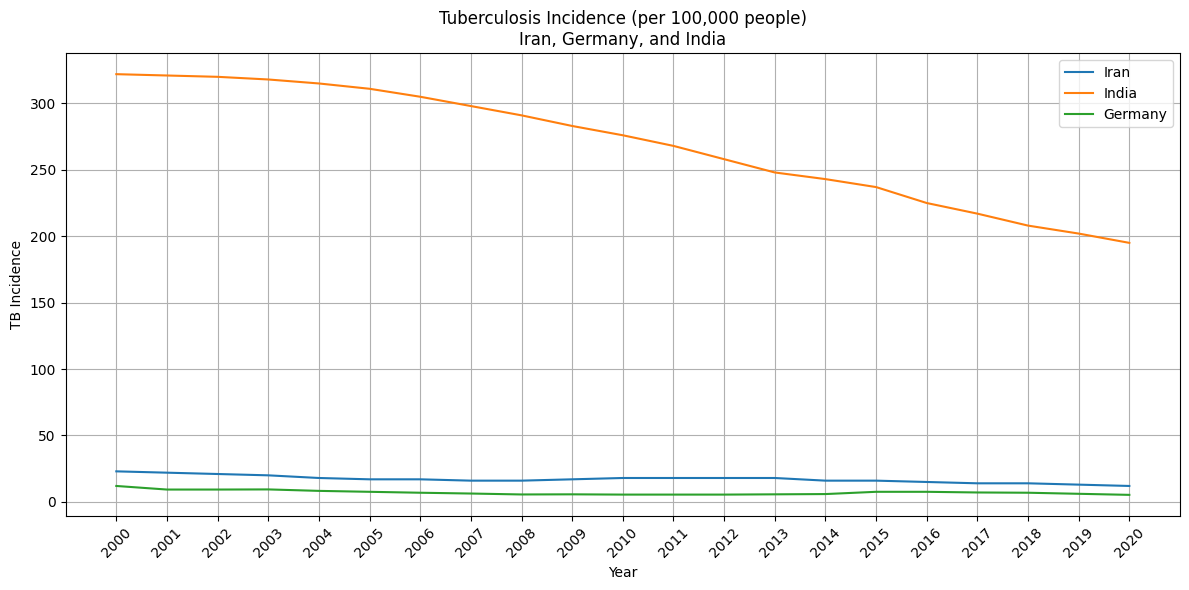

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter for TB incidence only
tb_data = data[data['Series Name'] == 'Incidence of tuberculosis (per 100,000 people)']

# Extract year columns and convert values to numeric
year_columns = tb_data.columns[2:]
tb_data[year_columns] = tb_data[year_columns].apply(pd.to_numeric, errors='coerce')

# Filter for specific countries
countries_of_interest = ['Iran', 'Germany', 'India']
tb_selected = tb_data[tb_data['Country'].isin(countries_of_interest)]

# Clean year labels for x-axis
years_cleaned = [col.split()[0] for col in year_columns]

# Plotting
plt.figure(figsize=(12, 6))
for _, row in tb_selected.iterrows():
    plt.plot(years_cleaned, row[year_columns], label=row['Country'])

plt.title('Tuberculosis Incidence (per 100,000 people)\nIran, Germany, and India')
plt.xlabel('Year')
plt.ylabel('TB Incidence')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Total Alcohol Consumption per capita(liters of pure alcohol, projected estimates, 15+ years of age)

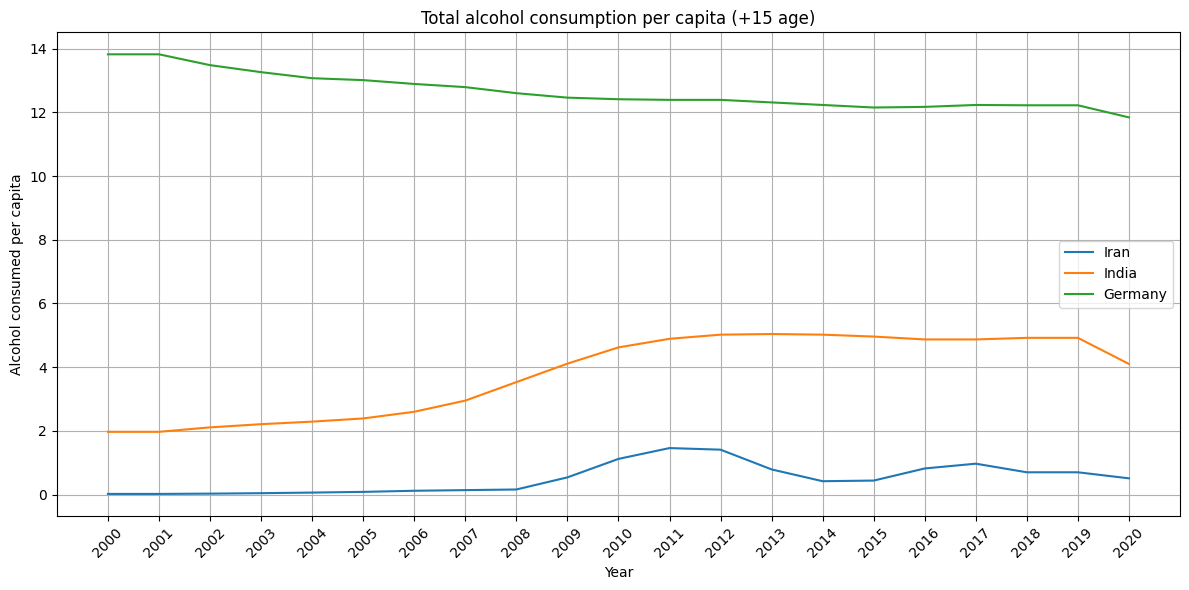

In [ ]:
al_data = data[data['Series Name'] == 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'].copy()

# Extract year columns and convert values to numeric
year_columns = al_data.columns[2:]
al_data[year_columns] = al_data[year_columns].apply(pd.to_numeric, errors='coerce')

# Apply the SAME country mapping to al_data as you did for tb_data:
country_mapping = {
    "IRN": "Iran",
    "DEU": "Germany",
    "IND": "India"
}
al_data['Country'] = al_data['Country'].map(country_mapping).fillna(al_data['Country'])

# Now filter using the updated 'Country' column and full country names:
countries_of_interest = ["Iran", "Germany", "India"]
al_selected = al_data[al_data['Country'].isin(countries_of_interest)]

# Clean year labels for x-axis
years_cleaned = [col.split()[0] for col in year_columns]

# Plotting
plt.figure(figsize=(12, 6))
for _, row in al_selected.iterrows():
    plt.plot(years_cleaned, row[year_columns], label=row['Country'])

plt.title('Total alcohol consumption per capita (+15 age)')
plt.xlabel('Year')
plt.ylabel('Alcohol consumed per capita')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Alcohol Consumption in India, Iran, and Germany (2000–2020), Male, Female and Total population

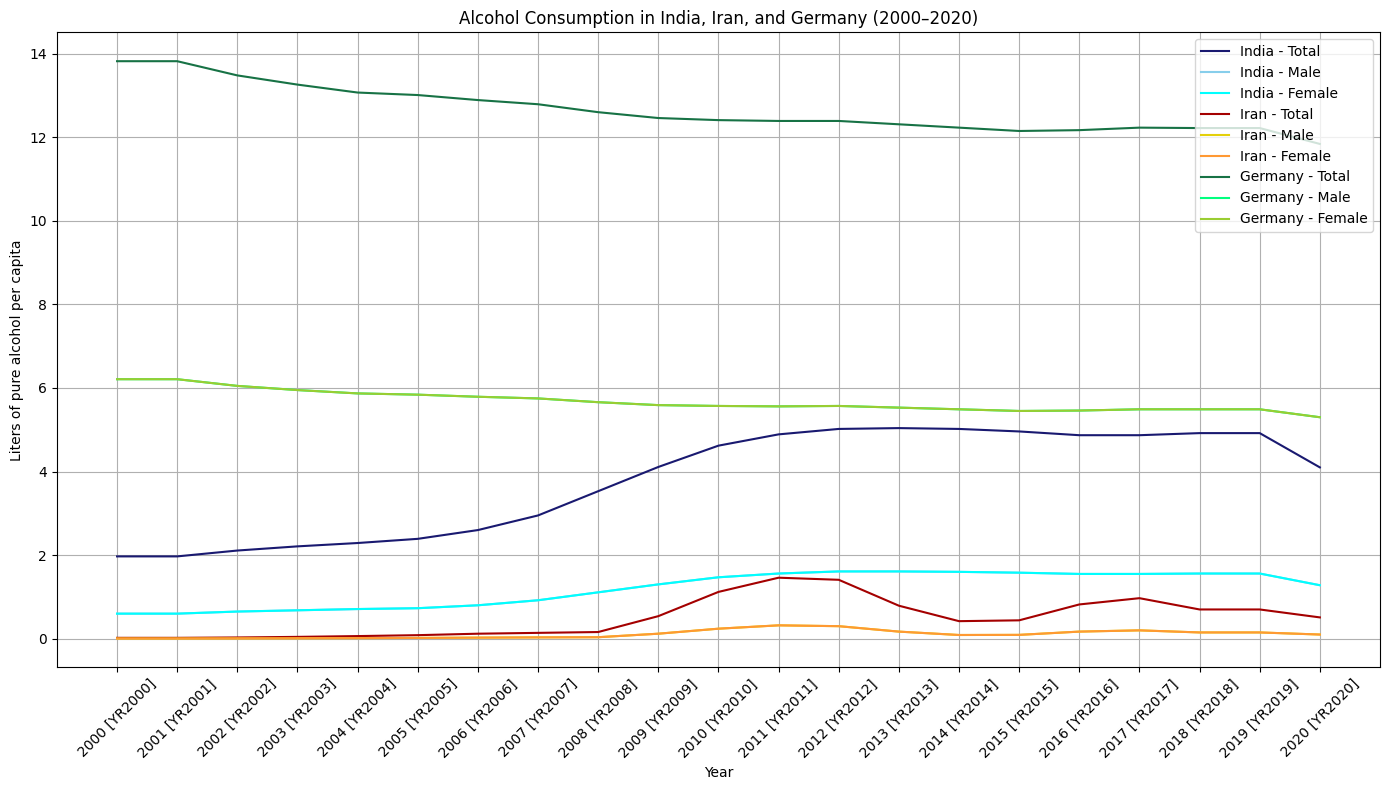

In [ ]:
# Filter for alcohol consumption records
df=data
alcohol_df = df[df["Series Name"].str.contains("Total alcohol consumption per capita")]

# Countries of interest
countries = ["India", "Iran", "Germany"]
filtered_df = alcohol_df[alcohol_df["Country"].isin(countries)]

# Extract the years
years = [col for col in df.columns if "YR" in col]

# Assign unique colors for each country-gender combination
line_colors = {
    ("India", "Total"): "#191970",   # dark blue
    ("India", "male"): "#87ceeb",    # light blue
    ("India", "female"): "#00ffff",  # cyan

    ("Iran", "Total"): "#a40000",    # dark red
    ("Iran", "male"): "#e4d00a",     # light orange
    ("Iran", "female"): "#ff9933",   # saffron

    ("Germany", "Total"): "#177245", # dark green
    ("Germany", "male"): "#00ff7f",  # light green
    ("Germany", "female"): "#9acd32" # taupe
}

# Plotting
plt.figure(figsize=(14, 8))

for country in countries:
    country_data = filtered_df[filtered_df["Country"] == country]
    for label in ["Total", "male", "female"]:
        row = country_data[country_data["Series Name"].str.contains(label, case=False)]
        if not row.empty:
            label_title = label.capitalize()
            color = line_colors[(country, label)]
            plt.plot(
                years,
                row.iloc[0][years],
                label=f"{country} - {label_title}",
                color=color
            )

plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Liters of pure alcohol per capita")
plt.title("Alcohol Consumption in India, Iran, and Germany (2000–2020)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

* Tuberculosis Incidence per 100,000 people in Iran
* Visualized Tuberculosis Incidence per 100,000 people in Iran

Tuberculosis Incidence per 100,000 people in Iran
Interquartile Range (IQR): 2.0
Minimum: 12.0
Maximum: 23.0
Standard Deviation: 2.741302469452239
Variance: 7.514739229024944


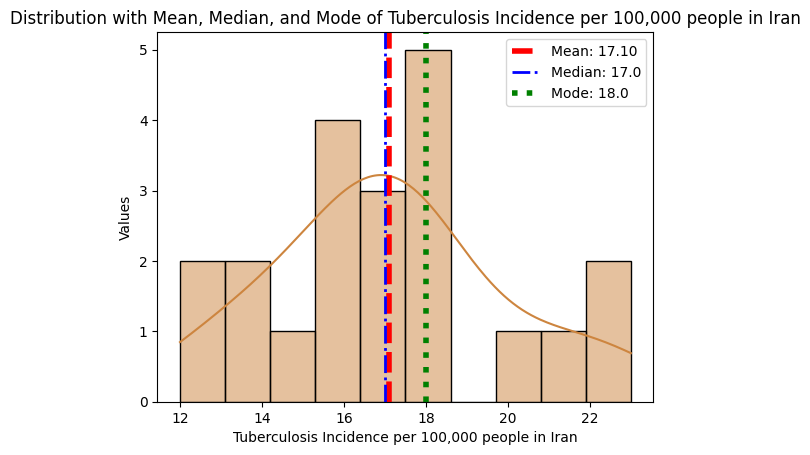

 The orange line represents the median (50th percentile) 
 The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers


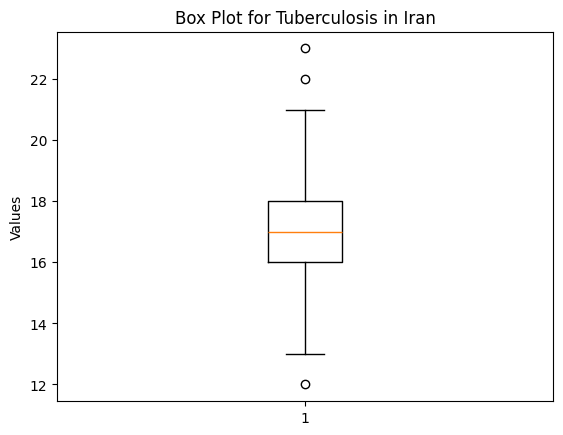

In [ ]:
import seaborn as sns
dataset = data
tuberiran = dataset.iloc[0, 2:].values
# Ensure x is a NumPy array of floats
tuberiran = tuberiran.astype(float)
print(f"Tuberculosis Incidence per 100,000 people in Iran")
# Calculate statistics
mean_valtubeiran = np.mean(tuberiran)
median_valtubeiran = np.median(tuberiran)
mode_valtubeiran = stats.mode(tuberiran, keepdims=True)[0][0]
iqr_valtubeiran = stats.iqr(tuberiran)
min_valtubeiran = np.min(tuberiran)
max_valtubeiran = np.max(tuberiran)
std_devtubeiran = np.std(tuberiran)
variancetubeiran = np.var(tuberiran)

# Print results
print("Interquartile Range (IQR):", iqr_valtubeiran)
print("Minimum:", min_valtubeiran)
print("Maximum:", max_valtubeiran)
print("Standard Deviation:", std_devtubeiran)
print("Variance:", variancetubeiran)

sns.histplot(tuberiran, kde=True, color='peru', bins=10)
# Overlay mean, median, and mode
plt.axvline(mean_valtubeiran, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_valtubeiran:.2f}')
plt.axvline(median_valtubeiran, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_valtubeiran}')
plt.axvline(mode_valtubeiran, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_valtubeiran}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode of Tuberculosis Incidence per 100,000 people in Iran')
plt.xlabel('Tuberculosis Incidence per 100,000 people in Iran')
plt.ylabel('Values')
plt.show()
print(f"\033[1m The orange line represents the median (50th percentile) \033[0m")
print(f" The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers")
plt.boxplot(tuberiran)
plt.title("Box Plot for Tuberculosis in Iran")
plt.ylabel("Values")
plt.show()

* tuberculosis Incidence per 100,000 people in India
* Visualized Tuberculosis Incidence per 100,000 people in India

Tuberculosis Incidence per 100,000 people in Iran
Interquartile Range (IQR): 74.0
Minimum: 195.0
Maximum: 322.0
Standard Deviation: 42.45061155941935
Variance: 1802.0544217687075


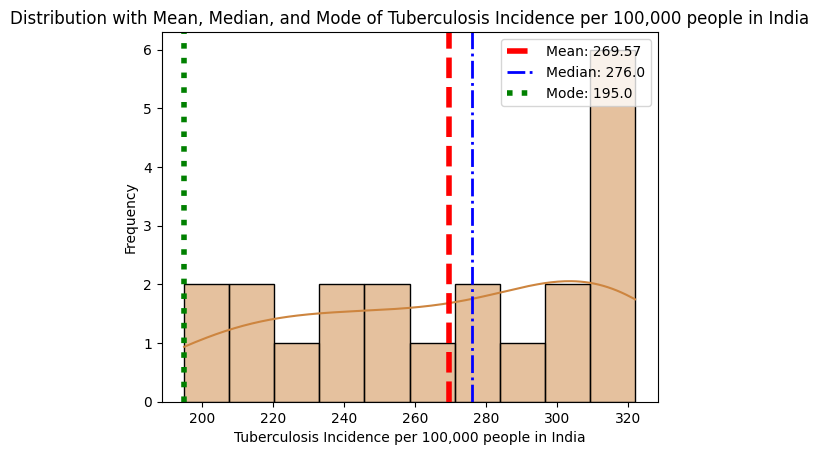

 The orange line represents the median (50th percentile) 
 The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers


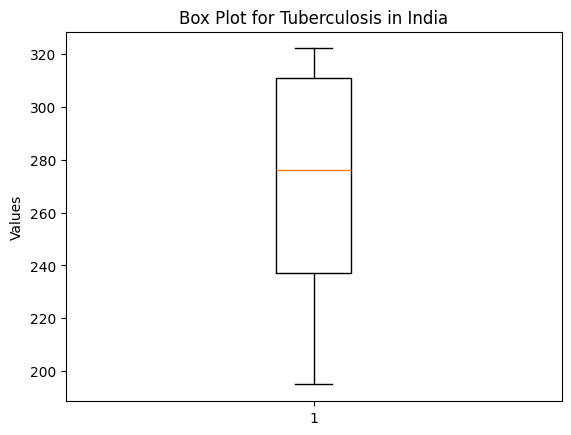

In [ ]:
tuberindia = dataset.iloc[4, 2:].values
# Ensure x is a NumPy array of floats
tuberindia = tuberindia.astype(float)
print(f"Tuberculosis Incidence per 100,000 people in India")
# Calculate statistics
mean_valtubeindia = np.mean(tuberindia)
median_valtubeindia = np.median(tuberindia)
mode_valtubeindia = stats.mode(tuberindia, keepdims=True)[0][0]
iqr_valtubeindia = stats.iqr(tuberindia)
min_valtubeindia = np.min(tuberindia)
max_valtubeindia = np.max(tuberindia)
std_devtubeindia = np.std(tuberindia)
variancetubeindia = np.var(tuberindia)

# Print results
print("Interquartile Range (IQR):", iqr_valtubeindia)
print("Minimum:", min_valtubeindia)
print("Maximum:", max_valtubeindia)
print("Standard Deviation:", std_devtubeindia)
print("Variance:", variancetubeindia)
###############################################################
import seaborn as sns
sns.histplot(tuberindia, kde=True, color='peru', bins=10)
# Overlay mean, median, and mode
plt.axvline(mean_valtubeindia, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_valtubeindia:.2f}')
plt.axvline(median_valtubeindia, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_valtubeindia}')
plt.axvline(mode_valtubeindia, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_valtubeindia}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode of Tuberculosis Incidence per 100,000 people in India')
plt.xlabel('Tuberculosis Incidence per 100,000 people in India')
plt.ylabel('Frequency')
plt.show()
##############################################################
print(f"\033[1m The orange line represents the median (50th percentile) \033[0m")
print(f" The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers")
plt.boxplot(tuberindia)
plt.title("Box Plot for Tuberculosis in India")
plt.ylabel("Values")
plt.show()

* Tuberculosis Incidence per 100,000 people in Germany
* Visualized Tuberculosis Incidence per 100,000 people in Germany

Tuberculosis Incidence per 100,000 people in Germany
Interquartile Range (IQR): 1.8999999999999995
Minimum: 5.3
Maximum: 12.0
Standard Deviation: 1.7101935284528198
Variance: 2.9247619047619056


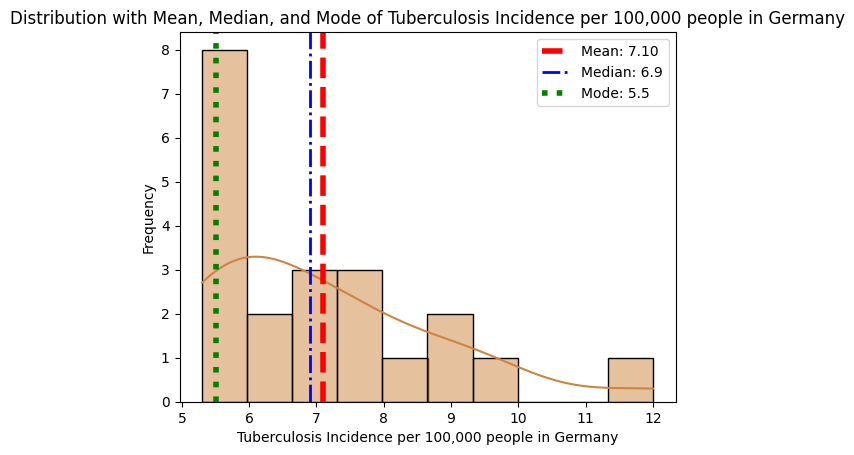

 The orange line represents the median (50th percentile) 
 The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers


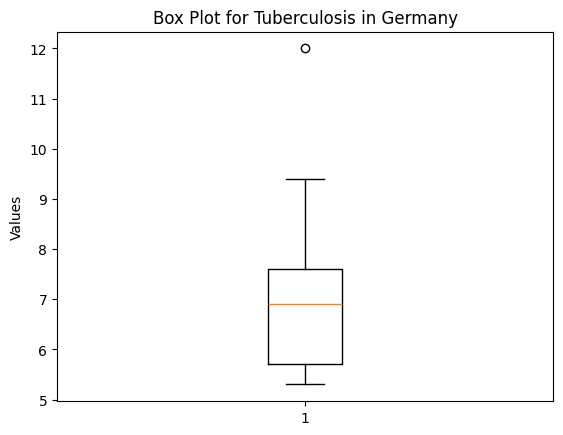

In [ ]:
tuberGermany = dataset.iloc[8, 2:].values
# Ensure x is a NumPy array of floats
tuberGermany = tuberGermany.astype(float)
print(f"Tuberculosis Incidence per 100,000 people in Germany")
# Calculate statistics
mean_valtubeGermany = np.mean(tuberGermany)
median_valtubeGermany = np.median(tuberGermany)
mode_valtubeGermany = stats.mode(tuberGermany, keepdims=True)[0][0]
iqr_valtubeGermany = stats.iqr(tuberGermany)
min_valtubeGermany = np.min(tuberGermany)
max_valtubeGermany = np.max(tuberGermany)
std_devtubeGermany = np.std(tuberGermany)
variancetubeGermany = np.var(tuberGermany)

# Print results
print("Interquartile Range (IQR):", iqr_valtubeGermany)
print("Minimum:", min_valtubeGermany)
print("Maximum:", max_valtubeGermany)
print("Standard Deviation:", std_devtubeGermany)
print("Variance:", variancetubeGermany)
###########################################################
sns.histplot(tuberGermany, kde=True, color='peru', bins=10)
# Overlay mean, median, and mode
plt.axvline(mean_valtubeGermany, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_valtubeGermany:.2f}')
plt.axvline(median_valtubeGermany, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_valtubeGermany}')
plt.axvline(mode_valtubeGermany, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_valtubeGermany}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode of Tuberculosis Incidence per 100,000 people in Germany')
plt.xlabel('Tuberculosis Incidence per 100,000 people in Germany')
plt.ylabel('Frequency')
plt.show()
#######################################################3
print(f"\033[1m The orange line represents the median (50th percentile) \033[0m")
print(f" The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers")
plt.boxplot(tuberGermany)
plt.title("Box Plot for Tuberculosis in Germany")
plt.ylabel("Values")
plt.show()


* Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) in Iran
* Visualized Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Iran

Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Iran
Interquartile Range (IQR): 0.7050000000000001
Minimum: 0.021
Maximum: 1.46
Standard Deviation: 0.4511106374895585
Variance: 0.20350080725623584


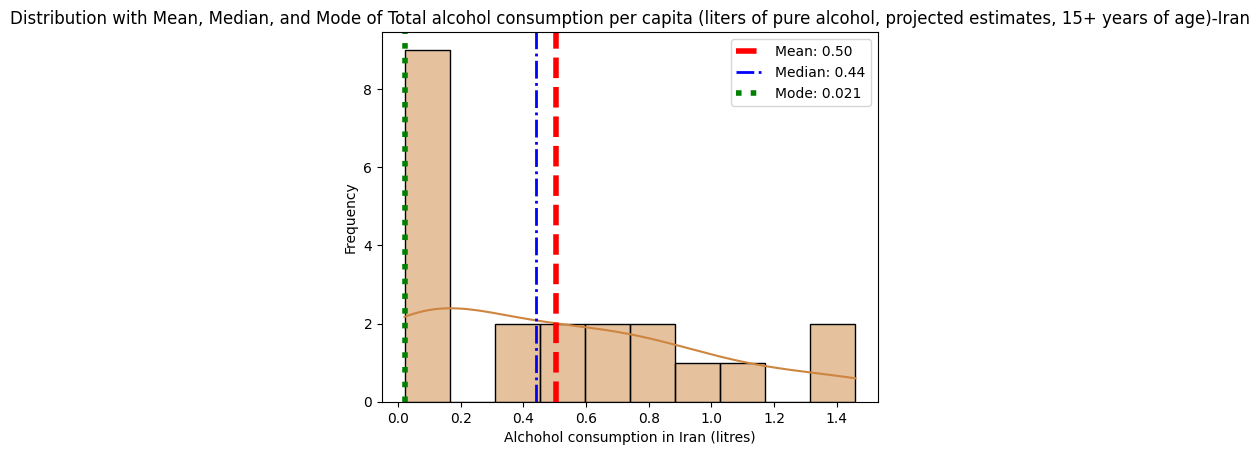

 The orange line represents the median (50th percentile) 
 The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers


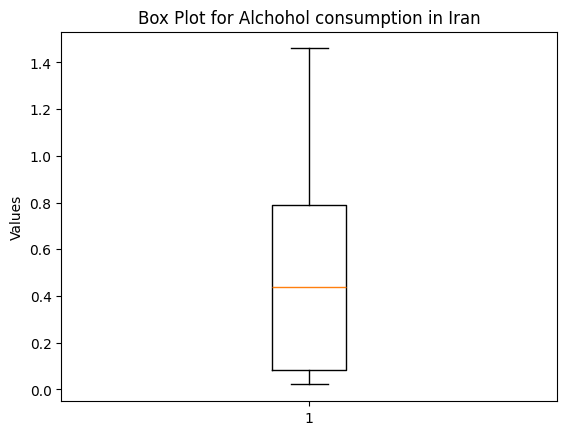

In [ ]:
Alchohol_Iran = dataset.iloc[1, 2:].values
# Ensure x is a NumPy array of floats
Alchohol_Iran = Alchohol_Iran.astype(float)
print(f"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Iran")
# Calculate statistics
mean_Alchohol_Iran = np.mean(Alchohol_Iran)
median_Alchohol_Iran = np.median(Alchohol_Iran)
mode_Alchohol_Iran = stats.mode(Alchohol_Iran, keepdims=True)[0][0]
iqr_Alchohol_Iran = stats.iqr(Alchohol_Iran)
min_Alchohol_Iran = np.min(Alchohol_Iran)
max_Alchohol_Iran = np.max(Alchohol_Iran)
std_Alchohol_Iran = np.std(Alchohol_Iran)
varianceAlchohol_Iran = np.var(Alchohol_Iran)

# Print results
print("Interquartile Range (IQR):", iqr_Alchohol_Iran)
print("Minimum:", min_Alchohol_Iran)
print("Maximum:", max_Alchohol_Iran)
print("Standard Deviation:", std_Alchohol_Iran)
print("Variance:", varianceAlchohol_Iran)

##############################################################

sns.histplot(Alchohol_Iran, kde=True, color='peru', bins=10)
# Overlay mean, median, and mode
plt.axvline(mean_Alchohol_Iran, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_Alchohol_Iran:.2f}')
plt.axvline(median_Alchohol_Iran, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_Alchohol_Iran}')
plt.axvline(mode_Alchohol_Iran, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_Alchohol_Iran}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode of Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Iran')
plt.xlabel('Alchohol consumption in Iran (litres)')
plt.ylabel('Frequency')
plt.show()

##############################################################
print(f"\033[1m The orange line represents the median (50th percentile) \033[0m")
print(f" The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers")
plt.boxplot(Alchohol_Iran)
plt.title("Box Plot for Alchohol consumption in Iran")
plt.ylabel("Values")
plt.show()

* Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) in India
* Visualized Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-India

Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Iran
Interquartile Range (IQR): 2.53
Minimum: 1.97
Maximum: 5.04
Standard Deviation: 1.220491332607701
Variance: 1.4895990929705216


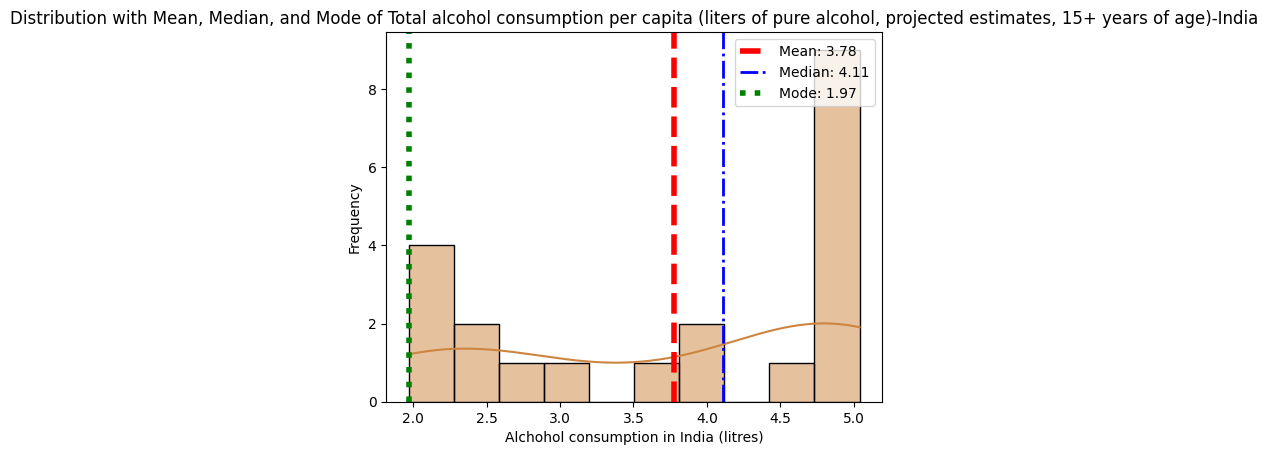

 The orange line represents the median (50th percentile) 
 The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers


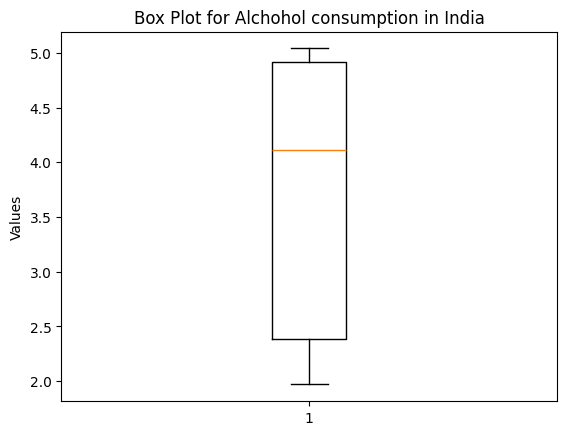

In [ ]:
Alchohol_India = dataset.iloc[5, 2:].values
# Ensure x is a NumPy array of floats
Alchohol_India = Alchohol_India.astype(float)
print(f"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Iran")
# Calculate statistics
mean_Alchohol_India = np.mean(Alchohol_India)
median_Alchohol_India = np.median(Alchohol_India)
mode_Alchohol_India = stats.mode(Alchohol_India, keepdims=True)[0][0]
iqr_Alchohol_India = stats.iqr(Alchohol_India)
min_Alchohol_India = np.min(Alchohol_India)
max_Alchohol_India = np.max(Alchohol_India)
std_Alchohol_India = np.std(Alchohol_India)
varianceAlchohol_India = np.var(Alchohol_India)

# Print results
print("Interquartile Range (IQR):", iqr_Alchohol_India)
print("Minimum:", min_Alchohol_India)
print("Maximum:", max_Alchohol_India)
print("Standard Deviation:", std_Alchohol_India)
print("Variance:", varianceAlchohol_India)
####################################################################
sns.histplot(Alchohol_India, kde=True, color='peru', bins=10)
# Overlay mean, median, and mode
plt.axvline(mean_Alchohol_India, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_Alchohol_India:.2f}')
plt.axvline(median_Alchohol_India, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_Alchohol_India}')
plt.axvline(mode_Alchohol_India, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_Alchohol_India}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode of Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-India')
plt.xlabel('Alchohol consumption in India (litres)')
plt.ylabel('Frequency')
plt.show()
###################################################################
print(f"\033[1m The orange line represents the median (50th percentile) \033[0m")
print(f" The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers")
plt.boxplot(Alchohol_India)
plt.title("Box Plot for Alchohol consumption in India")
plt.ylabel("Values")
plt.show()

* Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) in Germany
* Visualized Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Germany

Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Germany
Interquartile Range (IQR): 0.7799999999999994
Minimum: 11.84
Maximum: 13.82
Standard Deviation: 0.5515140981457451
Variance: 0.30416780045351466


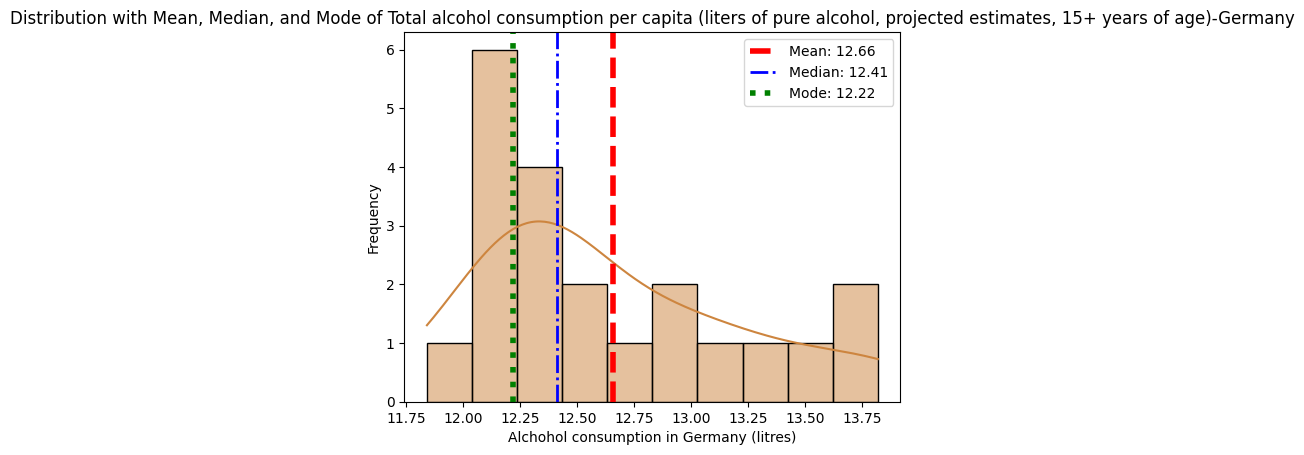

 The orange line represents the median (50th percentile) 
 The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers


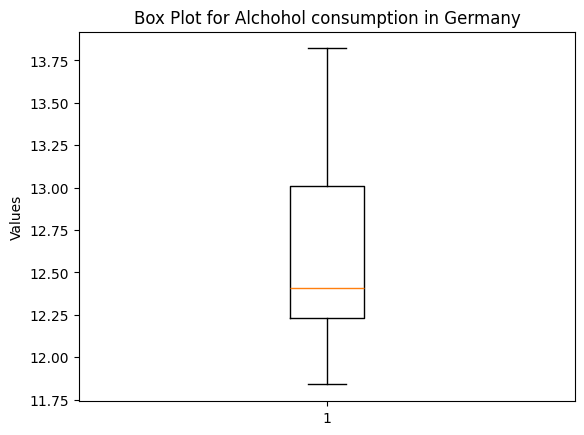

In [ ]:
Alchohol_Germany = dataset.iloc[9, 2:].values
# Ensure x is a NumPy array of floats
Alchohol_Germany = Alchohol_Germany.astype(float)
print(f"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Germany")
# Calculate statistics
mean_Alchohol_Germany = np.mean(Alchohol_Germany)
median_Alchohol_Germany = np.median(Alchohol_Germany)
mode_Alchohol_Germany = stats.mode(Alchohol_Germany, keepdims=True)[0][0]
iqr_Alchohol_Germany = stats.iqr(Alchohol_Germany)
min_Alchohol_Germany = np.min(Alchohol_Germany)
max_Alchohol_Germany = np.max(Alchohol_Germany)
std_Alchohol_Germany = np.std(Alchohol_Germany)
varianceAlchohol_Germany = np.var(Alchohol_Germany)

# Print results
print("Interquartile Range (IQR):", iqr_Alchohol_Germany)
print("Minimum:", min_Alchohol_Germany)
print("Maximum:", max_Alchohol_Germany)
print("Standard Deviation:", std_Alchohol_Germany)
print("Variance:", varianceAlchohol_Germany)
################################################################
sns.histplot(Alchohol_Germany, kde=True, color='peru', bins=10)
# Overlay mean, median, and mode
plt.axvline(mean_Alchohol_Germany, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_Alchohol_Germany:.2f}')
plt.axvline(median_Alchohol_Germany, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_Alchohol_Germany}')
plt.axvline(mode_Alchohol_Germany, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_Alchohol_Germany}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode of Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)-Germany')
plt.xlabel('Alchohol consumption in Germany (litres)')
plt.ylabel('Frequency')
plt.show()
################################################################
print(f"\033[1m The orange line represents the median (50th percentile) \033[0m")
print(f" The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers")
plt.boxplot(Alchohol_Germany)
plt.title("Box Plot for Alchohol consumption in Germany")
plt.ylabel("Values")
plt.show()

# Calculate Pearson correlation coefficient to see if there's a relation between Alcohol consumption and tuberculosis

Correlation between Alcohol Consumption vs Tuberculosis Rates in Iran

Pearson correlation coefficient (r): -0.3404
P-value: 0.1311
Fail to reject the null hypothesis: No significant correlation found.


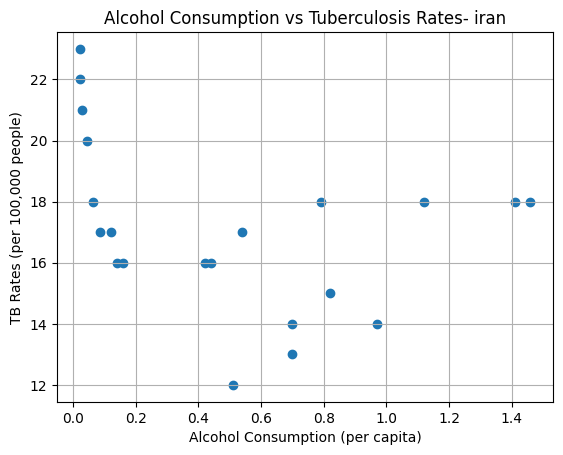

In [ ]:
# Step 1: Calculate Pearson correlation coefficient and p-value
r, p_value = stats.pearsonr(Alchohol_Iran, tuberiran)

# Step 2: Print results
print(f"Pearson correlation coefficient (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 3: Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant correlation exists.")
else:
    print("Fail to reject the null hypothesis: No significant correlation found.")

# Optional: plot the data
plt.scatter(Alchohol_Iran, tuberiran)
plt.title('Alcohol Consumption vs Tuberculosis Rates- iran')
plt.xlabel('Alcohol Consumption (per capita)')
plt.ylabel('TB Rates (per 100,000 people)')
plt.grid(True)
plt.show()

Correlation between Alcohol Consumption vs Tuberculosis Rates in India

Pearson correlation coefficient (r): -0.8511
P-value: 0.0000
Reject the null hypothesis: Significant correlation exists.


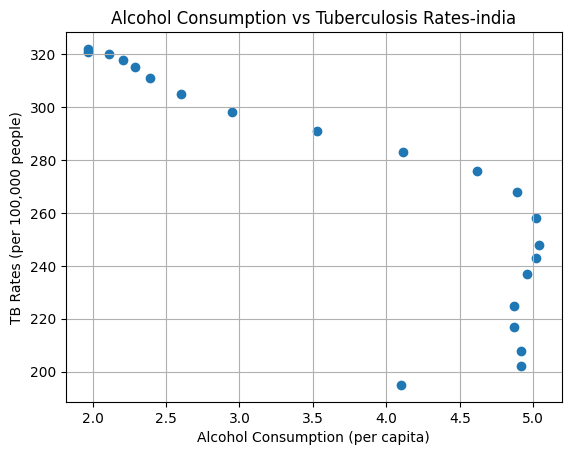

In [ ]:
# Step 1: Calculate Pearson correlation coefficient and p-value
r, p_value = stats.pearsonr(Alchohol_India, tuberindia)

# Step 2: Print results
print(f"Pearson correlation coefficient (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 3: Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant correlation exists.")
else:
    print("Fail to reject the null hypothesis: No significant correlation found.")

# Optional: plot the data
plt.scatter(Alchohol_India, tuberindia)
plt.title('Alcohol Consumption vs Tuberculosis Rates-india')
plt.xlabel('Alcohol Consumption (per capita)')
plt.ylabel('TB Rates (per 100,000 people)')
plt.grid(True)
plt.show()

Correlation between Alcohol Consumption vs Tuberculosis Rates in Germany

Pearson correlation coefficient (r): 0.8119
P-value: 0.0000
Reject the null hypothesis: Significant correlation exists.


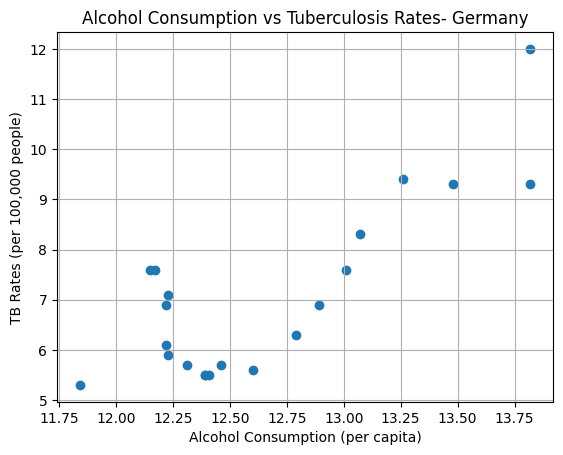

In [ ]:
# Step 1: Calculate Pearson correlation coefficient and p-value
r, p_value = stats.pearsonr(Alchohol_Germany, tuberGermany)

# Step 2: Print results
print(f"Pearson correlation coefficient (r): {r:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 3: Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant correlation exists.")
else:
    print("Fail to reject the null hypothesis: No significant correlation found.")

# Optional: plot the data
plt.scatter(Alchohol_Germany, tuberGermany)
plt.title('Alcohol Consumption vs Tuberculosis Rates- Germany')
plt.xlabel('Alcohol Consumption (per capita)')
plt.ylabel('TB Rates (per 100,000 people)')
plt.grid(True)
plt.show()

#Part 2: Empirical and Quantitative Distribution Comparison


PDF of Total Alcohol Consumption Per Capita in Iran (2000–2020)

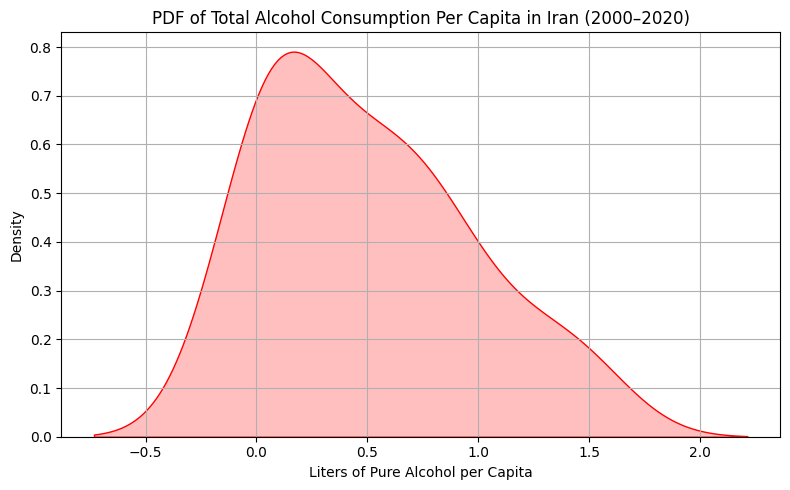

In [ ]:
import seaborn as sns
# Filter for Iran and the desired series
series_name = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
iran_data = data[(data['Country'] == 'Iran') & (data['Series Name'] == series_name)]

# Reshape the data to long format
iran_melted = iran_data.melt(
    id_vars=['Country'],
    value_vars=[col for col in data.columns if '[YR' in col],
    var_name='Year',
    value_name='Alcohol Consumption'
)

# Extract year and convert values
iran_melted['Year'] = iran_melted['Year'].str.extract('(\d{4})').astype(int)
iran_melted['Alcohol Consumption'] = pd.to_numeric(iran_melted['Alcohol Consumption'], errors='coerce')

# Drop missing values
iran_melted = iran_melted.dropna(subset=['Alcohol Consumption'])

# Plot the PDF
plt.figure(figsize=(8, 5))
sns.kdeplot(data=iran_melted, x='Alcohol Consumption', fill=True, color='red')
plt.title('PDF of Total Alcohol Consumption Per Capita in Iran (2000–2020)')
plt.xlabel('Liters of Pure Alcohol per Capita')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

PDF of Total Alcohol Consumption Per Capita in India (2000–2020)

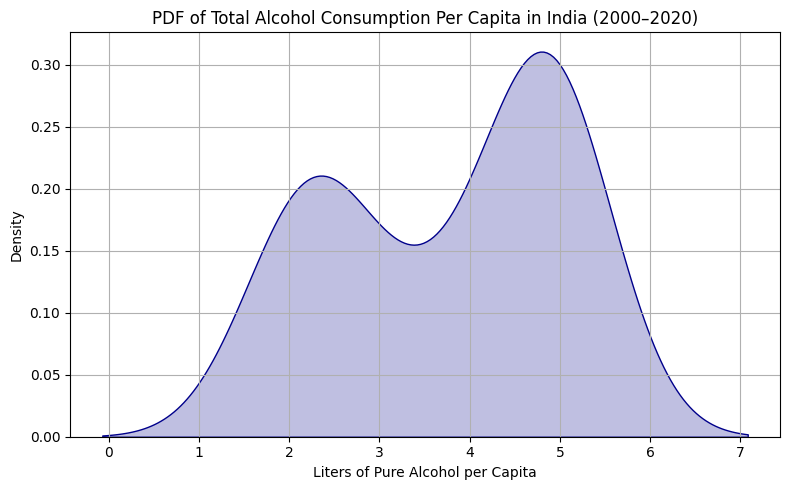

In [ ]:
series_name = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
india_data = data[(data['Country'] == 'India') & (data['Series Name'] == series_name)]

# Reshape the data to long format
india_melted = india_data.melt(
    id_vars=['Country'],
    value_vars=[col for col in data.columns if '[YR' in col],
    var_name='Year',
    value_name='Alcohol Consumption'
)

# Extract year and convert values
india_melted['Year'] = india_melted['Year'].str.extract('(\d{4})').astype(int)
india_melted['Alcohol Consumption'] = pd.to_numeric(india_melted['Alcohol Consumption'], errors='coerce')

# Drop missing values
india_melted = india_melted.dropna(subset=['Alcohol Consumption'])

# Plot the PDF
plt.figure(figsize=(8, 5))
sns.kdeplot(data=india_melted, x='Alcohol Consumption', fill=True, color='darkblue')
plt.title('PDF of Total Alcohol Consumption Per Capita in India (2000–2020)')
plt.xlabel('Liters of Pure Alcohol per Capita')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

PDF of Total Alcohol Consumption Per Capita in Germany (2000–2020)

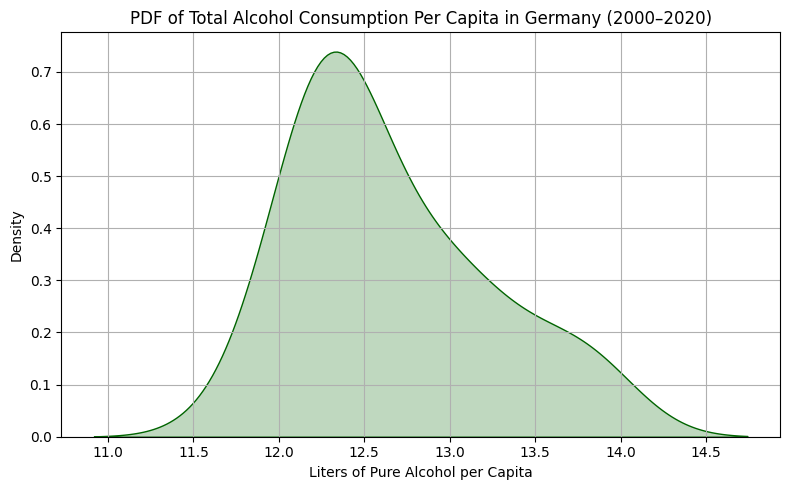

In [ ]:
series_name = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
germany_data = data[(data['Country'] == 'Germany') & (data['Series Name'] == series_name)]

# Reshape the data to long format
germany_melted = germany_data.melt(
    id_vars=['Country'],
    value_vars=[col for col in data.columns if '[YR' in col],
    var_name='Year',
    value_name='Alcohol Consumption'
)

# Extract year and convert values
germany_melted['Year'] = germany_melted['Year'].str.extract('(\d{4})').astype(int)
germany_melted['Alcohol Consumption'] = pd.to_numeric(germany_melted['Alcohol Consumption'], errors='coerce')

# Drop missing values
germany_melted = germany_melted.dropna(subset=['Alcohol Consumption'])

# Plot the PDF
plt.figure(figsize=(8, 5))
sns.kdeplot(data=germany_melted, x='Alcohol Consumption', fill=True, color='darkgreen')
plt.title('PDF of Total Alcohol Consumption Per Capita in Germany (2000–2020)')
plt.xlabel('Liters of Pure Alcohol per Capita')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

**Quantitative Comparison: PDF of Total Alcohol Consumption Per Capita (2000–2020) using Earth Mover's Distance**
Earth Mover's Distance quantifies how much "work" is needed to transform one distribution into another. In this case it tells how different are the alcohol consumption habits between the countries, over time

EMD (Iran vs India):    3.2760
EMD (Iran vs Germany):  12.1522
EMD (India vs Germany): 8.8762


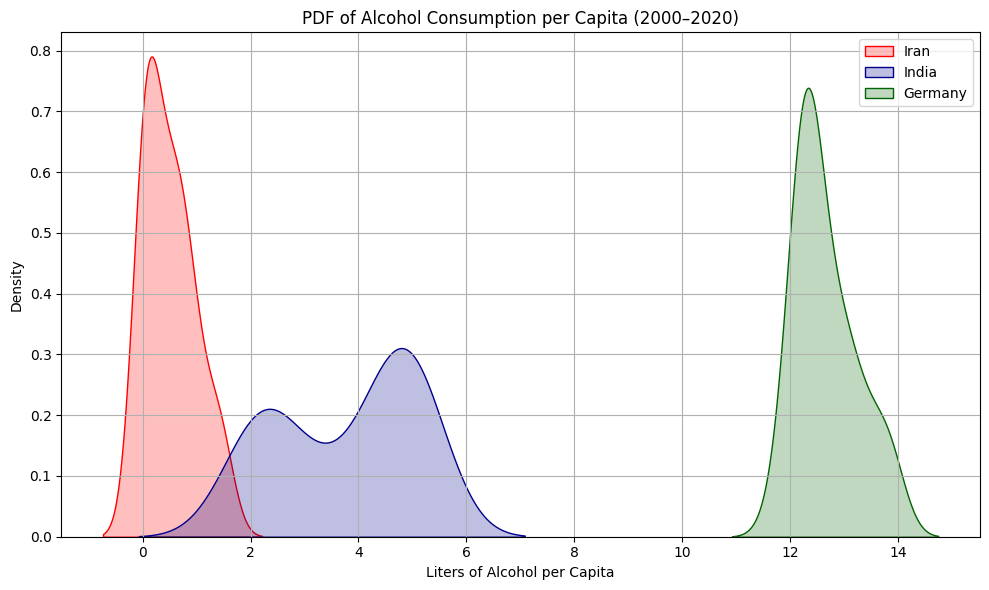

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance

# Load the dataset
df = data
# Filter the desired series
series_name = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
target_countries = ['Iran', 'India', 'Germany']
filtered_df = df[(df['Country'].isin(target_countries)) & (df['Series Name'] == series_name)]

# Reshape to long format
melted = filtered_df.melt(
    id_vars=['Country'],
    value_vars=[col for col in df.columns if '[YR' in col],
    var_name='Year',
    value_name='Alcohol Consumption'
)

# Clean up
melted['Year'] = melted['Year'].str.extract('(\d{4})').astype(int)
melted['Alcohol Consumption'] = pd.to_numeric(melted['Alcohol Consumption'], errors='coerce')
melted.dropna(subset=['Alcohol Consumption'], inplace=True)

# Extract distributions
iran = melted[melted['Country'] == 'Iran']['Alcohol Consumption'].values
india = melted[melted['Country'] == 'India']['Alcohol Consumption'].values
germany = melted[melted['Country'] == 'Germany']['Alcohol Consumption'].values

# Compute Earth Mover's Distance (Wasserstein)
emd_iran_india = wasserstein_distance(iran, india)
emd_iran_germany = wasserstein_distance(iran, germany)
emd_india_germany = wasserstein_distance(india, germany)

# Print results
print(f"EMD (Iran vs India):    {emd_iran_india:.4f}")
print(f"EMD (Iran vs Germany):  {emd_iran_germany:.4f}")
print(f"EMD (India vs Germany): {emd_india_germany:.4f}")

# Optional: plot distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(iran, label='Iran', fill=True, color='red')
sns.kdeplot(india, label='India', fill=True, color='darkblue')
sns.kdeplot(germany, label='Germany', fill=True, color='darkgreen')
plt.title('PDF of Alcohol Consumption per Capita (2000–2020)')
plt.xlabel('Liters of Alcohol per Capita')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Part 3: Distribution Fitting and Normality Testing

Fitted Normal Distributions for Total Alcohol Consumption and Tuberculosis per 100,1000 people  - Iran

Estimated mean: 17.10, standard deviation: 2.74


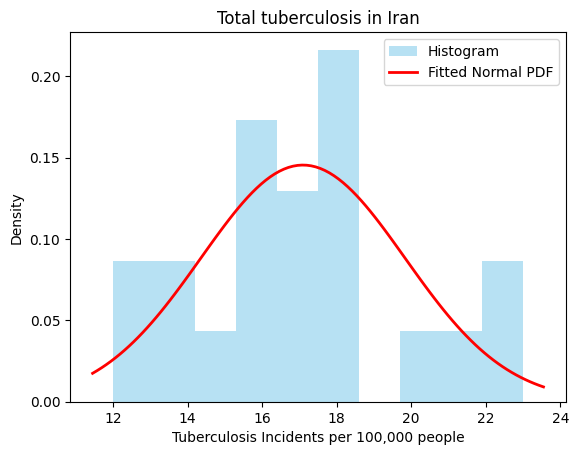

In [ ]:
from scipy.stats import norm

# Example: your data

# Step 1: Fit a normal distribution to the data
mu, std = norm.fit(tuberiran)

print(f"Estimated mean: {mu:.2f}, standard deviation: {std:.2f}")

# Step 2: Plot the histogram and PDF
plt.hist(tuberiran, bins=10, density=True, alpha=0.6, color='skyblue', label='Histogram')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal PDF')

plt.title('Fit Results: μ = %.2f, σ = %.2f' % (mu, std))
plt.title('Total tuberculosis in Iran')
plt.xlabel('Tuberculosis Incidents per 100,000 people')
plt.ylabel('Density')
plt.legend()
plt.show()

Estimated mean: 0.50, standard deviation: 0.45


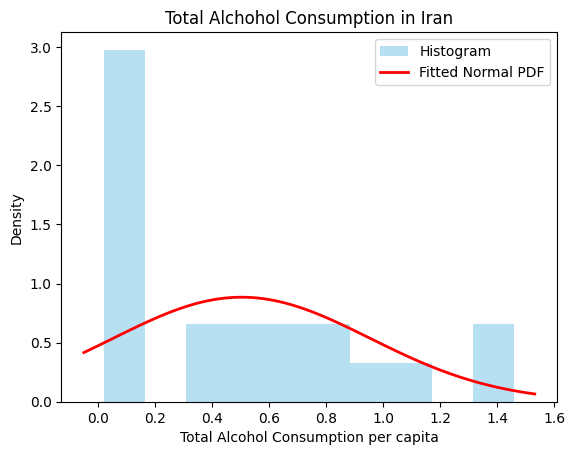

In [ ]:
#Fir normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example: your data

# Step 1: Fit a normal distribution to the data
mu, std = norm.fit(Alchohol_Iran)

print(f"Estimated mean: {mu:.2f}, standard deviation: {std:.2f}")

# Step 2: Plot the histogram and PDF
plt.hist(Alchohol_Iran, bins=10, density=True, alpha=0.6, color='skyblue', label='Histogram')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal PDF')

plt.title('Fit Results: μ = %.2f, σ = %.2f' % (mu, std))
plt.title('Total Alchohol Consumption in Iran')
plt.xlabel('Total Alcohol Consumption per capita')
plt.ylabel('Density')
plt.legend()
plt.show()

Fitted Normal Distributions for Total Alcohol Consumption and Tuberculosis per 100,1000 people  - India

Estimated mean: 269.57, standard deviation: 42.45


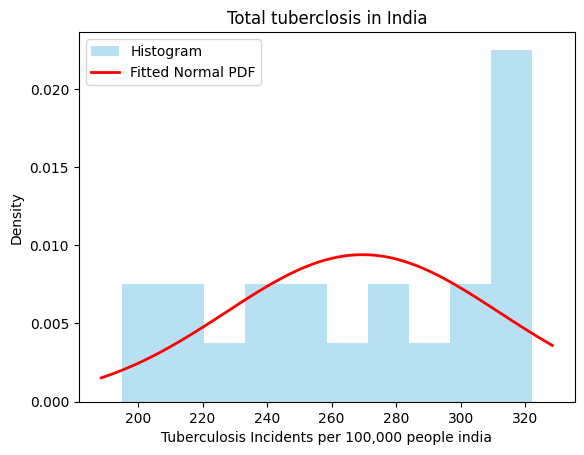

In [ ]:
#Fir normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example: your data

# Step 1: Fit a normal distribution to the data
mu, std = norm.fit(tuberindia)

print(f"Estimated mean: {mu:.2f}, standard deviation: {std:.2f}")

# Step 2: Plot the histogram and PDF
plt.hist(tuberindia, bins=10, density=True, alpha=0.6, color='skyblue', label='Histogram')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal PDF')

plt.title('Fit Results: μ = %.2f, σ = %.2f' % (mu, std))
plt.title('Total tuberclosis in India')
plt.xlabel('Tuberculosis Incidents per 100,000 people india')
plt.ylabel('Density')
plt.legend()
plt.show()

Estimated mean: 3.78, standard deviation: 1.22


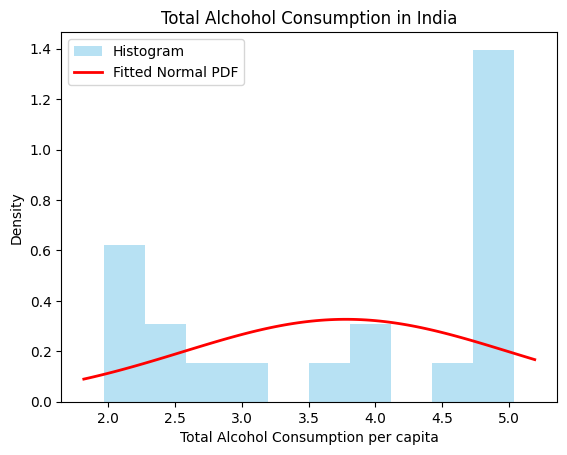

In [ ]:
#Fir normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example: your data

# Step 1: Fit a normal distribution to the data
mu, std = norm.fit(Alchohol_India)

print(f"Estimated mean: {mu:.2f}, standard deviation: {std:.2f}")

# Step 2: Plot the histogram and PDF
plt.hist(Alchohol_India, bins=10, density=True, alpha=0.6, color='skyblue', label='Histogram')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal PDF')

plt.title('Fit Results: μ = %.2f, σ = %.2f' % (mu, std))
plt.title('Total Alchohol Consumption in India')
plt.xlabel('Total Alcohol Consumption per capita')
plt.ylabel('Density')
plt.legend()
plt.show()

Fitted Normal Distributions for Total Alcohol Consumption and Tuberculosis per 100,1000 people  - Germany

Estimated mean: 7.10, standard deviation: 1.71


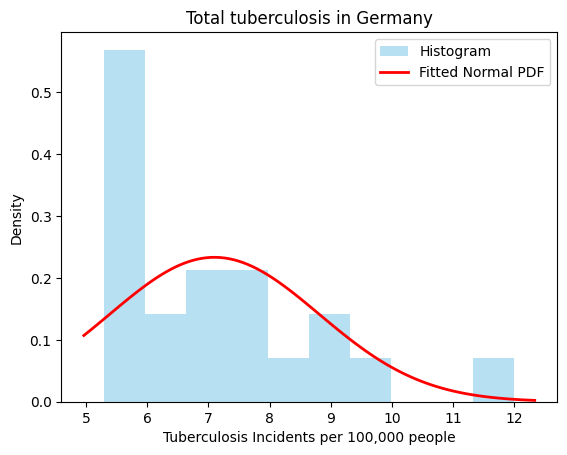

In [ ]:
#Fir normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example: your data

# Step 1: Fit a normal distribution to the data
mu, std = norm.fit(tuberGermany)

print(f"Estimated mean: {mu:.2f}, standard deviation: {std:.2f}")

# Step 2: Plot the histogram and PDF
plt.hist(tuberGermany, bins=10, density=True, alpha=0.6, color='skyblue', label='Histogram')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal PDF')

plt.title('Fit Results: μ = %.2f, σ = %.2f' % (mu, std))
plt.title('Total tuberculosis in Germany')
plt.xlabel('Tuberculosis Incidents per 100,000 people')
plt.ylabel('Density')
plt.legend()
plt.show()

Estimated mean: 12.66, standard deviation: 0.55


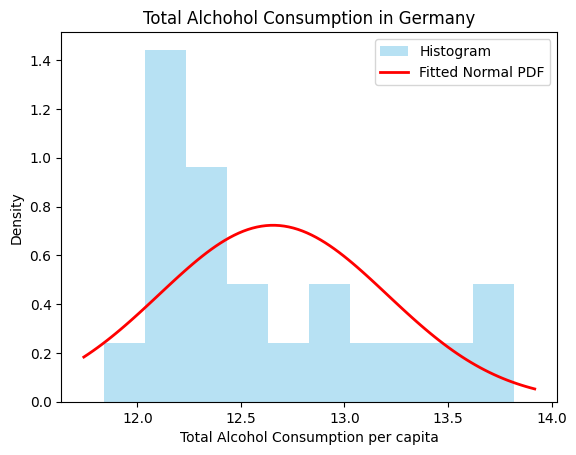

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example: your data

# Step 1: Fit a normal distribution to the data
mu, std = norm.fit(Alchohol_Germany)

print(f"Estimated mean: {mu:.2f}, standard deviation: {std:.2f}")

# Step 2: Plot the histogram and PDF
plt.hist(Alchohol_Germany, bins=10, density=True, alpha=0.6, color='skyblue', label='Histogram')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal PDF')

plt.title('Fit Results: μ = %.2f, σ = %.2f' % (mu, std))
plt.title('Total Alchohol Consumption in Germany')
plt.xlabel('Total Alcohol Consumption per capita')
plt.ylabel('Density')
plt.legend()
plt.show()

Q-Q Plot

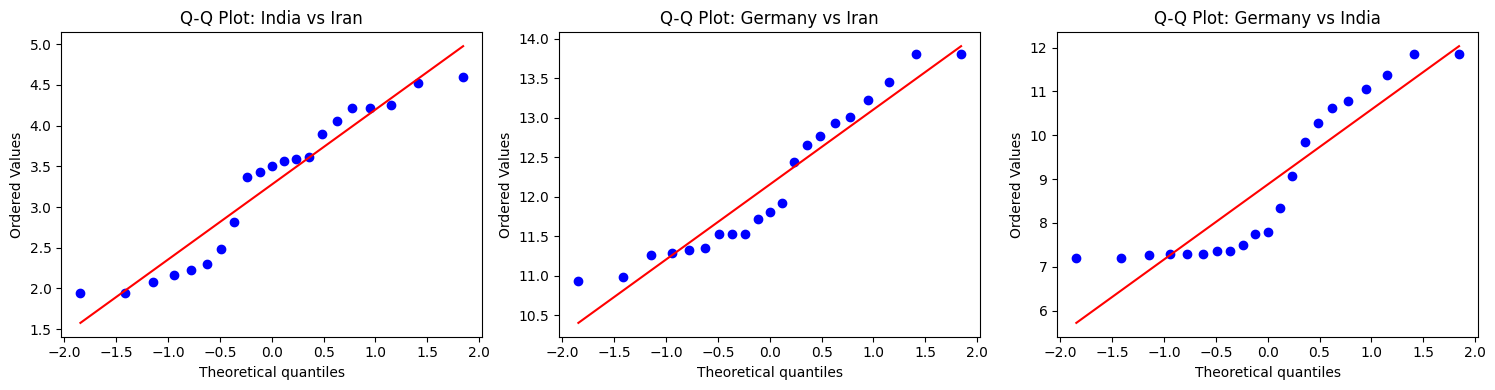

In [ ]:
# Filter for countries and series
series_name = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
target_countries = ['Iran', 'India', 'Germany']
filtered_df = df[(df['Country'].isin(target_countries)) & (df['Series Name'] == series_name)]

# Melt to long format
melted = filtered_df.melt(
    id_vars=['Country'],
    value_vars=[col for col in df.columns if '[YR' in col],
    var_name='Year',
    value_name='Alcohol Consumption'
)

# Clean and convert data
melted['Year'] = melted['Year'].str.extract('(\d{4})').astype(int)
melted['Alcohol Consumption'] = pd.to_numeric(melted['Alcohol Consumption'], errors='coerce')
melted.dropna(subset=['Alcohol Consumption'], inplace=True)

# Extract data
iran = melted[melted['Country'] == 'Iran']['Alcohol Consumption'].values
india = melted[melted['Country'] == 'India']['Alcohol Consumption'].values
germany = melted[melted['Country'] == 'Germany']['Alcohol Consumption'].values

# Ensure all arrays are same length (truncate to min length)
min_len = min(len(iran), len(india), len(germany))
iran, india, germany = iran[:min_len], india[:min_len], germany[:min_len]

# Plot Q-Q comparisons
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
stats.probplot(india - iran, dist="norm", plot=plt)
plt.title("Q-Q Plot: India vs Iran")

plt.subplot(1, 3, 2)
stats.probplot(germany - iran, dist="norm", plot=plt)
plt.title("Q-Q Plot: Germany vs Iran")

plt.subplot(1, 3, 3)
stats.probplot(germany - india, dist="norm", plot=plt)
plt.title("Q-Q Plot: Germany vs India")

plt.tight_layout()
plt.show()

Shapiro-Wilk Normality Test Results

In [ ]:
from scipy.stats import shapiro

# Filter for the relevant series and countries
series_name = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
countries = ['Iran', 'India', 'Germany']
filtered_df = df[(df['Country'].isin(countries)) & (df['Series Name'] == series_name)]

# Melt the dataset into long format
melted = filtered_df.melt(
    id_vars=['Country'],
    value_vars=[col for col in df.columns if '[YR' in col],
    var_name='Year',
    value_name='Alcohol Consumption'
)

# Clean the data
melted['Year'] = melted['Year'].str.extract('(\d{4})').astype(int)
melted['Alcohol Consumption'] = pd.to_numeric(melted['Alcohol Consumption'], errors='coerce')
melted.dropna(subset=['Alcohol Consumption'], inplace=True)

# Group by country
results = {}
for country in countries:
    data = melted[melted['Country'] == country]['Alcohol Consumption'].values
    stat, p_value = shapiro(data)
    results[country] = (stat, p_value)
print("Null Hypothesis (H₀): The data comes from a normal distribution\n")
print("Alternative Hypothesis (H₁): The data does not come from a normal distribution\n")
print("p-value > 0.05 → Fail to reject H₀ → Data is likely normal.\n")
print("p-value ≤ 0.05 → Reject H₀ → Data is not normally distributed.\n")

# Print Results
print("Shapiro-Wilk Normality Test Results:\n")
for country, (stat, p) in results.items():
    print(f"{country}:")
    print(f"  Test Statistic = {stat:.4f}")
    print(f"  p-value        = {p:.4f}")
    if p > 0.05:
        print("  ➤ Likely normal (fail to reject H₀)")
    else:
        print("  ➤ Not normal (reject H₀)")
    print()

Null Hypothesis (H₀): The data comes from a normal distribution

Alternative Hypothesis (H₁): The data does not come from a normal distribution

p-value > 0.05 → Fail to reject H₀ → Data is likely normal.

p-value ≤ 0.05 → Reject H₀ → Data is not normally distributed.

Shapiro-Wilk Normality Test Results:

Iran:
  Test Statistic = 0.8872
  p-value        = 0.0199
  ➤ Not normal (reject H₀)

India:
  Test Statistic = 0.8058
  p-value        = 0.0008
  ➤ Not normal (reject H₀)

Germany:
  Test Statistic = 0.8934
  p-value        = 0.0261
  ➤ Not normal (reject H₀)



Normality Tests: Q-Q Plots and Histograms with Fitted Normal Curve using Shapiro-Wilk Normality Test

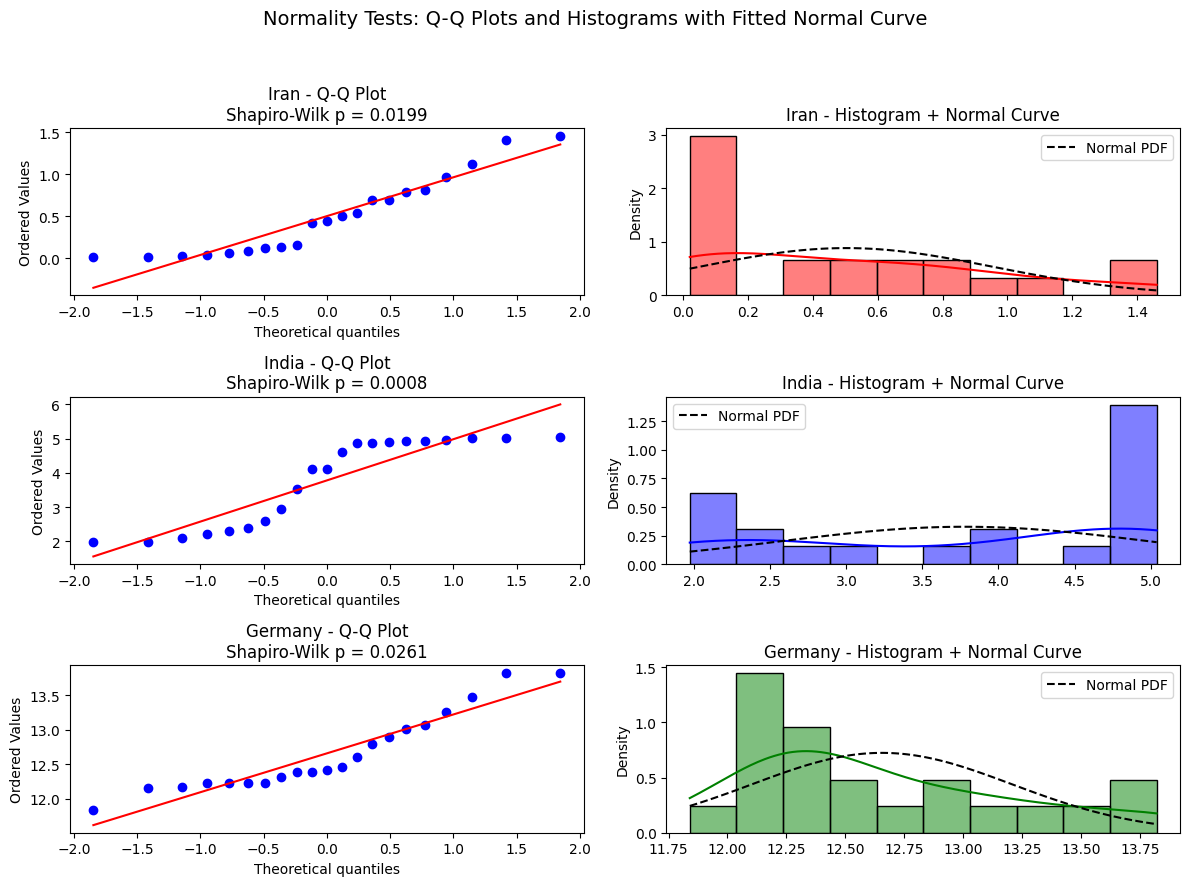

In [ ]:
series_name = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
countries = ['Iran', 'India', 'Germany']
colors = {'Iran': 'red', 'India': 'blue', 'Germany': 'green'}

filtered_df = df[(df['Country'].isin(countries)) & (df['Series Name'] == series_name)]

# Melt to long format
melted = filtered_df.melt(
    id_vars=['Country'],
    value_vars=[col for col in df.columns if '[YR' in col],
    var_name='Year',
    value_name='Alcohol Consumption'
)

# Clean
melted['Year'] = melted['Year'].str.extract('(\d{4})').astype(int)
melted['Alcohol Consumption'] = pd.to_numeric(melted['Alcohol Consumption'], errors='coerce')
melted.dropna(subset=['Alcohol Consumption'], inplace=True)

# Set up plots
fig, axes = plt.subplots(len(countries), 2, figsize=(12, 9))
fig.suptitle("Normality Tests: Q-Q Plots and Histograms with Fitted Normal Curve", fontsize=14)

for i, country in enumerate(countries):
    data = melted[melted['Country'] == country]['Alcohol Consumption'].values
    stat, p = shapiro(data)
    color = colors[country]

    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f"{country} - Q-Q Plot\nShapiro-Wilk p = {p:.4f}")

    # Histogram with KDE and normal curve
    sns.histplot(data, kde=True, stat="density", ax=axes[i, 1], color=color, edgecolor='black', bins=10)
    mean, std = np.mean(data), np.std(data)
    x = np.linspace(min(data), max(data), 100)
    normal_pdf = stats.norm.pdf(x, mean, std)
    axes[i, 1].plot(x, normal_pdf, color='black', linestyle='--', label='Normal PDF')
    axes[i, 1].set_title(f"{country} - Histogram + Normal Curve")
    axes[i, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Part 4: Central Limit Theorem (CLT) Assessment

In [ ]:
pip install pymannkendall

Bootstrap Resampling

Bootstrap Resampling: Distribution of Sample Means

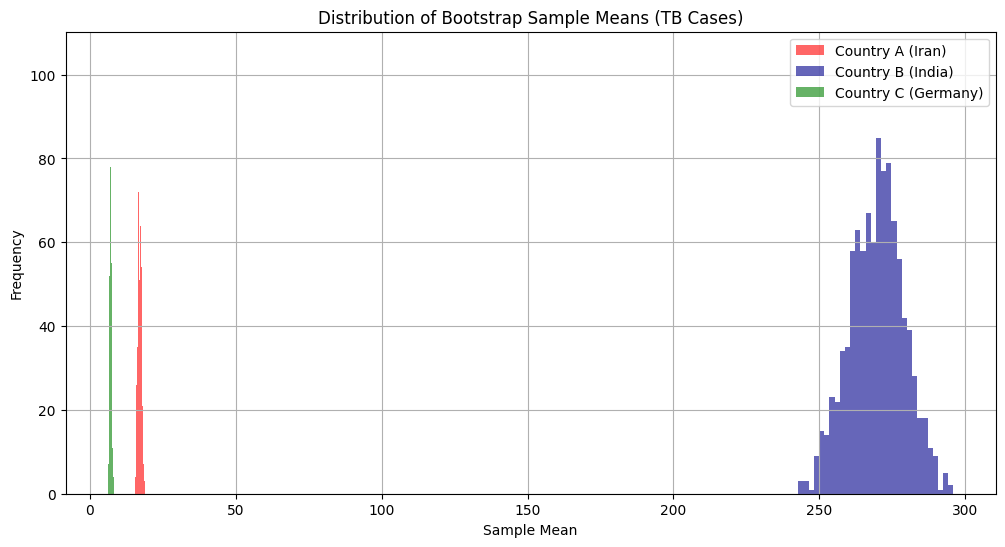

Bootstrap Sample Mean Statistics:
Country A (Iran):    Mean = 17.08, Std Dev = 0.59
Country B (India):   Mean = 269.73, Std Dev = 9.24
Country C (Germany): Mean = 7.10, Std Dev = 0.37

Original (Population) Statistics:
Country A (Iran):    Mean = 17.10, Std Dev = 2.74
Country B (India):   Mean = 269.57, Std Dev = 42.45
Country C (Germany): Mean = 7.10, Std Dev = 1.71

Shapiro-Wilk Normality Test on Resampled Means:
Country A (Iran):    p = 0.0644 → approximately normal
Country B (India):   p = 0.3076 → approximately normal
Country C (Germany): p = 0.0000 → not normally distributed

Interpretation:
The Shapiro-Wilk test results suggest whether the bootstrap distributions of the sample means are approximately normal.
According to the Central Limit Theorem (CLT), even if the original TB case data is not normally distributed,
the distribution of sample means should approximate normality given a sufficiently large sample size (n ~ 20 or more).
If the tests show approximate normality, it sup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Function to generate 1,000 bootstrap resamples and compute sample means
def bootstrap_means(data, n_resamples=1000):
    means = np.zeros(n_resamples)
    for i in range(n_resamples):
        sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(sample)
    return means

# Generate resampled means
n_resamples = 1000
means_a = bootstrap_means(tuberiran, n_resamples)
means_b = bootstrap_means(tuberindia, n_resamples)
means_c = bootstrap_means(tuberGermany, n_resamples)

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(means_a, bins=30, alpha=0.6, label='Country A (Iran)', color='red')
plt.hist(means_b, bins=30, alpha=0.6, label='Country B (India)', color='darkblue')
plt.hist(means_c, bins=30, alpha=0.6, label='Country C (Germany)', color='green')
plt.title('Distribution of Bootstrap Sample Means (TB Cases)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Report mean and standard deviation of sample means
print("Bootstrap Sample Mean Statistics:")
print(f"Country A (Iran):    Mean = {np.mean(means_a):.2f}, Std Dev = {np.std(means_a):.2f}")
print(f"Country B (India):   Mean = {np.mean(means_b):.2f}, Std Dev = {np.std(means_b):.2f}")
print(f"Country C (Germany): Mean = {np.mean(means_c):.2f}, Std Dev = {np.std(means_c):.2f}")

# Report original population statistics
print("\nOriginal (Population) Statistics:")
print(f"Country A (Iran):    Mean = {np.mean(tuberiran):.2f}, Std Dev = {np.std(tuberiran):.2f}")
print(f"Country B (India):   Mean = {np.mean(tuberindia):.2f}, Std Dev = {np.std(tuberindia):.2f}")
print(f"Country C (Germany): Mean = {np.mean(tuberGermany):.2f}, Std Dev = {np.std(tuberGermany):.2f}")

# Perform Shapiro-Wilk normality test on the sample means
print("\nShapiro-Wilk Normality Test on Resampled Means:")
stat_a, p_a = shapiro(means_a)
stat_b, p_b = shapiro(means_b)
stat_c, p_c = shapiro(means_c)

def interpret(p):
    return "approximately normal" if p > 0.05 else "not normally distributed"

print(f"Country A (Iran):    p = {p_a:.4f} → {interpret(p_a)}")
print(f"Country B (India):   p = {p_b:.4f} → {interpret(p_b)}")
print(f"Country C (Germany): p = {p_c:.4f} → {interpret(p_c)}")

# Reflection on Central Limit Theorem
print("\nInterpretation:")
print("The Shapiro-Wilk test results suggest whether the bootstrap distributions of the sample means are approximately normal.")
print("According to the Central Limit Theorem (CLT), even if the original TB case data is not normally distributed,")
print("the distribution of sample means should approximate normality given a sufficiently large sample size (n ~ 20 or more).")
print("If the tests show approximate normality, it supports the applicability of the CLT in this context.")

#Part 5: Hypothesis Testing Framework

Hypothesis Testing: Q-Q Plots and Histograms with Fitted Normal Curve using Mann-Kendall Test

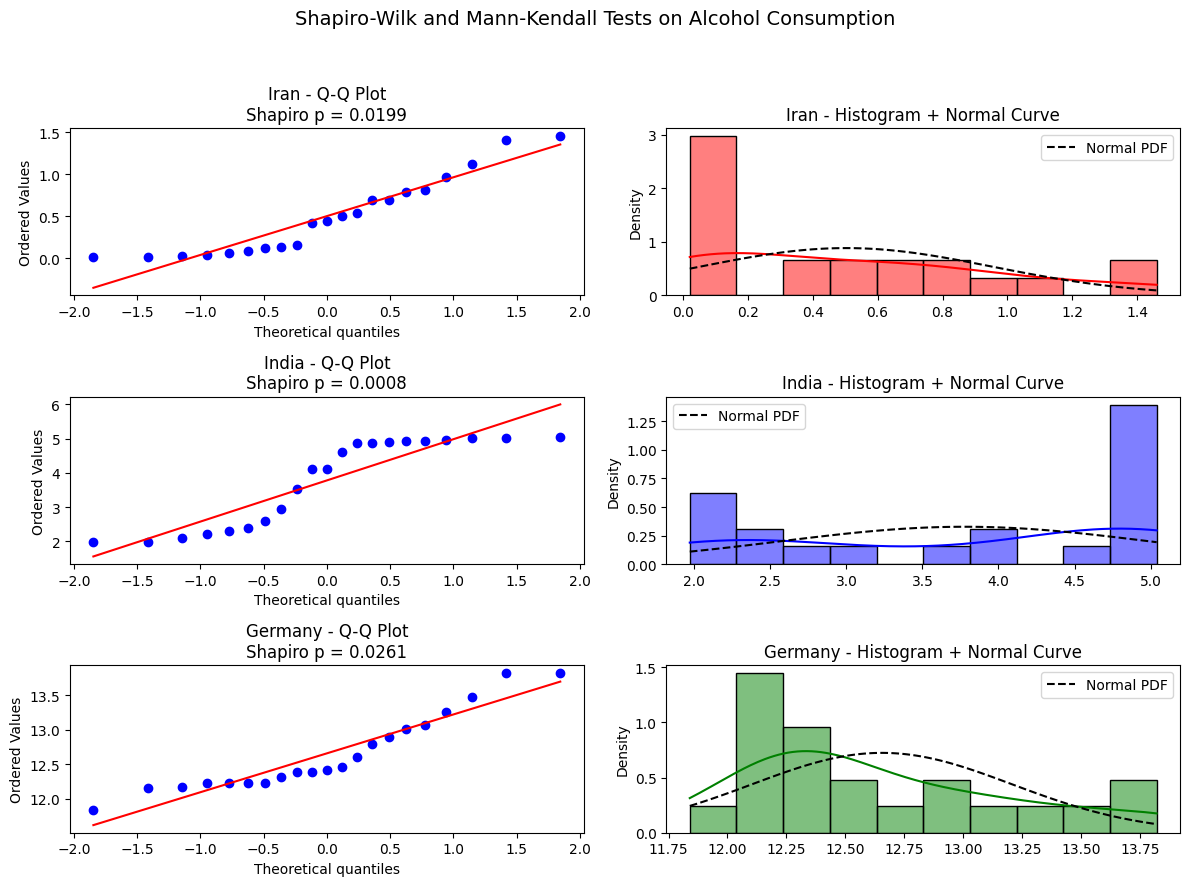


 Mann-Kendall Trend Test Results:

Iran:
  Trend      : increasing
  p-value    : 0.00015805361526166628
  Reject H₀? : Yes

India:
  Trend      : increasing
  p-value    : 2.6102680491302266e-05
  Reject H₀? : Yes

Germany:
  Trend      : decreasing
  p-value    : 7.5522232911851e-09
  Reject H₀? : Yes


In [ ]:
#H₀ (null): No monotonic trend in the data (random over time)
#H₁ (alt): A monotonic trend does exist (either upward or downward)
#If H = True and p < 0.05, the trend is statistically significant.
#pip install pymannkendall

import pymannkendall as mk

# Define parameters
series_name = "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
countries = ['Iran', 'India', 'Germany']
colors = {'Iran': 'red', 'India': 'blue', 'Germany': 'green'}

# Filter and reshape
filtered_df = df[(df['Country'].isin(countries)) & (df['Series Name'] == series_name)]
melted = filtered_df.melt(
    id_vars=['Country'],
    value_vars=[col for col in df.columns if '[YR' in col],
    var_name='Year',
    value_name='Alcohol Consumption'
)

# Clean
melted['Year'] = melted['Year'].str.extract('(\d{4})').astype(int)
melted['Alcohol Consumption'] = pd.to_numeric(melted['Alcohol Consumption'], errors='coerce')
melted.dropna(subset=['Alcohol Consumption'], inplace=True)

# Initialize trend results
trend_results = {}

# Plotting
fig, axes = plt.subplots(len(countries), 2, figsize=(12, 9))
fig.suptitle("Shapiro-Wilk and Mann-Kendall Tests on Alcohol Consumption", fontsize=14)

for i, country in enumerate(countries):
    country_data = melted[melted['Country'] == country].sort_values(by='Year')
    values = country_data['Alcohol Consumption'].values
    years = country_data['Year'].values

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(values)

    # Mann-Kendall Trend Test
    mk_result = mk.original_test(values)
    trend_results[country] = mk_result

    # Q-Q Plot
    stats.probplot(values, dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f"{country} - Q-Q Plot\nShapiro p = {shapiro_p:.4f}")

    # Histogram
    color = colors[country]
    sns.histplot(values, kde=True, stat="density", ax=axes[i, 1], color=color, edgecolor='black', bins=10)
    mean, std = np.mean(values), np.std(values)
    x = np.linspace(min(values), max(values), 100)
    normal_pdf = stats.norm.pdf(x, mean, std)
    axes[i, 1].plot(x, normal_pdf, color='black', linestyle='--', label='Normal PDF')
    axes[i, 1].set_title(f"{country} - Histogram + Normal Curve")
    axes[i, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print Mann-Kendall Results
print("\n Mann-Kendall Trend Test Results:")
for country, result in trend_results.items():
    print(f"\n{country}:")
    print(f"  Trend      : {getattr(result, 'trend', 'N/A')}")
    print(f"  p-value    : {getattr(result, 'p', 'N/A')}")
    print(f"  Reject H₀? : {'Yes' if getattr(result, 'h', False) else 'No'}")